# 整然(Tidy)データ

## この環境(jupyter notebook)で処理を実行するには

---

+ コード(ここではpythonのコード や 各種のコマンド)や説明書き(markdown)の書かれたブロックのことをセルと呼びます
+ コードの実行は対象セルがアクティブな状態で **SHIFT + ENTER** または **Ctrl + ENTER** で実施します
  + 対象セルをアクティブにするにはセルをクリックすればOKです(セルの左横に青いバーが表示されます)
    + 「SHIFT + ENTER」:対象セルを実行→次のセルをアクティブにする
    + 「Ctrl + ENTER」:対象セルを実行→現在のセルがアクティブのまま
+ まずは**上から順に実行**していってください
    + 実行中or実行完了の判断は右上に位置しているPython(Pyodide)の右横にある〇印で行います
    + 〇が灰色になっていれば実行中<status:busy>,白色になれば実行完了(または実行前)の状態<status:idle>となります
      + 〇をマウスオーバーするとstatusのほかに実行時間などの情報が表示されます
---

+ ではためしに↓のセルをアクティブにして SHIFT + ENTER を押してみて下さい！

In [1]:
#print
print("出力結果はこんな感じになるよ")

出力結果はこんな感じになるよ


---
+ うまく文字列が出力されたら順番に以下のセルを実行していってください！

In [2]:
#数値の計算
12 + 5

17

In [3]:
#変数へ数値を代入
x = 3
y = 2
x * y

6

In [4]:
#変数へ文字列を代入
a = "菅田"
b = "将暉"
a + b

'菅田将暉'

+ とりあえずセルに書かれたコードの実行の仕方は把握されたかと思います
+ では進みましょう(pythonとは？はいまのところは知らなくてもよいです)

---
## **雑然データから整然データへの変換**

このノートブックと同じ場所に格納されているデータ**shotput.csv**および**tydy_shotput.csv**はスポーツテストで実施した砲丸投げの計測結果のデータと定義して進めて行きます。
+ 各員5回の投擲を実施しその飛距離を計測
+ 各員の名前はアルファベット一文字で表されている

### 必要なライブラリをインポートする
+ pandas : データフレームをハンドリングするライブラリ
+ 環境によってはこの処理に40～50秒程度かかるかもしれません

In [6]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

### CSVファイル shotput.csv (雑然データ)を読み込む
+ 政府の統計データや各種の配布データは人間の理解しやすさを重視し以下に出力されるような表データとして配布されることが多いです
+ ただしこれはコンピュータでのデータ処理にはやや向いていません

In [7]:
df = pd.read_csv("shotput.csv")
df

,名前,性別,1投目,2投目,3投目,4投目,5投目
0,A,F,4.80,7.40,9.70,7.90,7.30
1,B,M,6.45,4.02,5.10,4.90,2.44
2,C,M,11.50,3.60,6.30,7.54,4.67
3,D,F,6.40,8.40,5.00,2.80,8.80
4,E,F,7.45,6.00,2.70,4.80,4.80
5,F,M,5.08,4.83,2.96,4.74,5.16
6,G,F,2.93,8.70,4.79,7.28,4.10
7,J,M,5.27,4.09,4.35,3.54,3.66
8,M,F,4.23,11.89,3.51,11.18,2.21
9,O,M,8.10,2.35,5.03,4.75,5.94


---
## 整然データを読み込む

+ 先ほど読み込んだ雑然データ shotput.csv を整然データに変換したものである **tydy_shotput.csv** を読み込んでみましょう

In [8]:
dft = pd.read_csv("tidy_shotput.csv")
dft

,名前,性別,投目,距離
0,A,F,1,4.80
1,B,M,1,6.45
2,C,M,1,11.50
3,D,F,1,6.40
4,E,F,1,7.45
5,F,M,1,5.08
6,G,F,1,2.93
7,J,M,1,5.27
8,M,F,1,4.23
9,O,M,1,8.10


+ このような整然データにしておけば各種の集計(データの抽出)がたやすくなります

---
### 整然データを用いてデータの抽出処理(エクセルのフィルタのよーなもの)を実施 
+ データ解析で用いられるプログラミング言語(Python,Rなど)で用意されているデータ処理や作図の関数はこのような整然データを前提としています。
+ まずは各員の第一回目の計測結果のみを抽出してみましょう。

In [9]:
dft1 = dft[dft["投目"]==1]
dft1

,名前,性別,投目,距離
0,A,F,1,4.80
1,B,M,1,6.45
2,C,M,1,11.50
3,D,F,1,6.40
4,E,F,1,7.45
5,F,M,1,5.08
6,G,F,1,2.93
7,J,M,1,5.27
8,M,F,1,4.23
9,O,M,1,8.10


+ 次に第1投目における男女の投擲の記述統計量を求め、各群における距離のばらつきを箱ひげ図で表してみましょう。

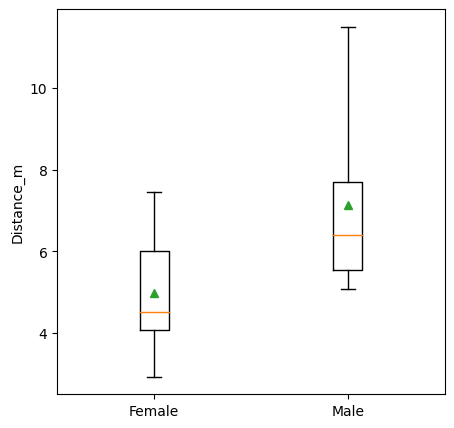

In [20]:
#import matplotlib.pyplot as plt

fdata = dft1[dft1["性別"]=="F"]['距離']
mdata = dft1[dft1["性別"]=="M"]['距離']

fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)
ax1.boxplot((fdata,mdata),showmeans=True, whis=[0,100])# whis=[0,100] と引数を指定すると最大値と最小値がひげの先端となる
ax1.set_xticklabels(['Female', 'Male'])
ax1.set_ylabel('Distance_m')
plt.show()

---
### 元の視認しやすいデータに戻すこともできます
+ なので最初から **整然データを整備** しておけばよいのです
+ たとえば**クロス集計**処理を行うことで先ほど配布した shotput.csv とおなじ状態にデータを成形することができます

In [11]:
dft.pivot_table(values = "距離", index = ["名前","性別"], columns = "投目")

,投目,1,2,3,4,5
名前,性別,,,,,
A,F,4.80,7.40,9.70,7.90,7.30
B,M,6.45,4.02,5.10,4.90,2.44
C,M,11.50,3.60,6.30,7.54,4.67
D,F,6.40,8.40,5.00,2.80,8.80
E,F,7.45,6.00,2.70,4.80,4.80
F,M,5.08,4.83,2.96,4.74,5.16
G,F,2.93,8.70,4.79,7.28,4.10
J,M,5.27,4.09,4.35,3.54,3.66
M,F,4.23,11.89,3.51,11.18,2.21


---
### 雑然データを整然データに変換する
+ ある程度整理されたデータによっては雑然データを整然データに変換することができます。
+ 以下より先ほど提示した雑然データ **shotput.csv** をコンピュータ処理に向いた[整然データ](https://id.fnshr.info/2017/01/09/tidy-data-intro/)へ変換する処理を行います。
+ 整然データへの変換には **pd.melt()** 関数を用いて処理を行います。オプションは以下のように設定します。
+ **やることその1:** 変更しない列を決める
  + **id_vars：** 変更しない列名「**名前**」「**性別**」を指定する 
---
+ **やることその2:** 同質のデータが異なる列「1」「2」「3」「4」「5」の値として格納されているため，それらを一つの列「距離」にまとめる
  + **value_name：** やること1の結果が格納される列名「**距離**」を指定する    
---
+ **やることその3:** 元データの列名「1投目」「2投目」「3投目」「4投目」「5投目」自体を値とする列「投目」を作成する
  + **var_name：** やること2の結果が格納される列名「**投目**」を指定する

In [21]:
dfm = pd.melt(df,id_vars=["名前","性別"], value_name="距離", var_name="投目")
dfm.to_csv("shotput_to_tidy.csv",index = True)
dfm

,名前,性別,投目,距離
0,A,F,1投目,4.80
1,B,M,1投目,6.45
2,C,M,1投目,11.50
3,D,F,1投目,6.40
4,E,F,1投目,7.45
5,F,M,1投目,5.08
6,G,F,1投目,2.93
7,J,M,1投目,5.27
8,M,F,1投目,4.23
9,O,M,1投目,8.10


+ 投目列の各レコードに含まれる文字列"投目"をデータから削除し整数として定義する

In [22]:
dfm["投目"] = dfm["投目"].apply(lambda x: int(x.replace("投目","")))
dfm

,名前,性別,投目,距離
0,A,F,1,4.80
1,B,M,1,6.45
2,C,M,1,11.50
3,D,F,1,6.40
4,E,F,1,7.45
5,F,M,1,5.08
6,G,F,1,2.93
7,J,M,1,5.27
8,M,F,1,4.23
9,O,M,1,8.10
